#### Machine Learning, part 2
We need to add more songs to our datasets

### Playlists to use
*Playlists are from The Sounds of Spotify account*
- Pop https://open.spotify.com/playlist/6gS3HhOiI17QNojjPuPzqc?si=3cb7d649868d46a8
- Rap
https://open.spotify.com/playlist/6s5MoZzR70Qef7x4bVxDO1?si=f01e6bc903f8472d
- Rock
https://open.spotify.com/playlist/7dowgSWOmvdpwNkGFMUs6e?si=cf2bbe1a778c47b4
- R&B
https://open.spotify.com/playlist/1rLnwJimWCmjp3f0mEbnkY?si=26fc9e91959b452c
- EDM/Dance
https://open.spotify.com/playlist/3pDxuMpz94eDs7WFqudTbZ?si=01234d7b8c3b4c35
- Country
https://open.spotify.com/playlist/4mijVkpSXJziPiOrK7YX4M?si=c5b5ba6029dc4945

In [1]:
!pip install textblob

In [1]:
#Import packages
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Let's authenticate our Spotify API
id = 'bac4b759e5b849eaaf680041d0302a8f'
secret = 'e4314d290eb74b3c963cc745b4ca7b93'

client_credentials_manager = SpotifyClientCredentials(client_id=id, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
playlist_ids = ['6gS3HhOiI17QNojjPuPzqc','6s5MoZzR70Qef7x4bVxDO1','7dowgSWOmvdpwNkGFMUs6e',
               '1rLnwJimWCmjp3f0mEbnkY','3pDxuMpz94eDs7WFqudTbZ','4mijVkpSXJziPiOrK7YX4M']


In [4]:
#Create function to get Spotify Track ID's
#limit set as highest starting index for playlists [2000:]
limit = 2000
def getTrackIDs(user, playlist_id, i):
    ids = []
    while i <= limit:
        #offset is starting index of playlist (Spotify looks through playlists 100 songs at a time)
        playlist = sp.user_playlist_tracks(user, playlist_id, offset=i)
        for item in playlist['items']:
            track = item['track']
            ids.append(track['id'])
        i += 100
    return ids

In [6]:
pop = getTrackIDs('thesoundsofspotify','6gS3HhOiI17QNojjPuPzqc',0)

In [35]:
rap = getTrackIDs('thesoundsofspotify','6s5MoZzR70Qef7x4bVxDO1',0)
rock = getTrackIDs('thesoundsofspotify','7dowgSWOmvdpwNkGFMUs6e',0)
rnb = getTrackIDs('thesoundsofspotify','1rLnwJimWCmjp3f0mEbnkY',0)
edm = getTrackIDs('thesoundsofspotify','3pDxuMpz94eDs7WFqudTbZ',0)
country = getTrackIDs('thesoundsofspotify','4mijVkpSXJziPiOrK7YX4M',0)

In [7]:
#1245 songs in pop
len(pop)

1248

In [13]:
#Get playlist track features
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  track_id = meta['id'] 
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  key = features[0]['key']
  mode = features[0]['mode']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']

  track = [name, album, artist, track_id, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, key, mode, liveness, loudness, speechiness, tempo, time_signature, valence]
  return track

In [15]:
#create pop df
tracks = []
for i in range(len(pop)):
  time.sleep(.5 )
  track = getTrackFeatures(pop[i])
  tracks.append(track)

#Create pop playlist
pop_df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'id', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [16]:
pop_df.to_csv('pop.csv')

In [80]:
#Create csv file
df.to_csv('music.csv')

In [19]:
#create rap df
tracks = []
for i in range(len(rap)):
  time.sleep(.5)
  track = getTrackFeatures(rap[i])
  tracks.append(track)

#Create rao playlist
rap_df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'id', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [21]:
#create rock df
tracks = []
for i in range(len(rock)):
  time.sleep(.5)
  track = getTrackFeatures(rock[i])
  tracks.append(track)

#Create rock playlist
rock_df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'id', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [22]:
rock_df.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,More Than a Feeling,Boston,Boston,1QEEqeFIZktqIpPI4jSVSF,1976,285133,75,0.377,0.00088,0.681,0.002300,7,1,0.0504,-8.039,0.0298,108.789,4,0.285
1,Baba O'Riley,Who's Next (Deluxe Edition),The Who,3qiyyUfYe7CRYLucrPmulD,1971-08-14,300400,72,0.489,0.31300,0.724,0.185000,5,1,0.2870,-8.367,0.0352,117.292,4,0.150
2,Jump - 2015 Remaster,1984 (Remastered),Van Halen,7N3PAbqfTjSEU1edb2tY8j,1984-01-04,241599,75,0.572,0.17100,0.835,0.000377,0,1,0.0702,-6.219,0.0317,129.981,4,0.795
3,Sweet Home Alabama,Second Helping (Expanded Edition),Lynyrd Skynyrd,7e89621JPkKaeDSTQ3avtg,1974-04-15,283800,77,0.596,0.18100,0.605,0.000331,7,1,0.0863,-12.145,0.0255,97.798,4,0.886
4,Drive - 2017 Remaster,Heartbeat City (Expanded Edition),The Cars,2lFFiNm0XtgJ6wkdncTB4k,1984,234332,67,0.261,0.11500,0.703,0.000780,6,1,0.1020,-7.871,0.0414,83.495,4,0.405


In [37]:
#create rnb df
tracks = []
for i in range(len(rnb)):
  time.sleep(.5)
  track = getTrackFeatures(rnb[i])
  tracks.append(track)

#Create pop playlist
rnb_df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'id', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [38]:
#create edm df
tracks = []
for i in range(len(edm)):
  time.sleep(.5)
  track = getTrackFeatures(edm[i])
  tracks.append(track)

#Create pop playlist
edm_df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'id', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [41]:
#create country df
tracks = []
for i in range(len(country)):
  time.sleep(.5)
  track = getTrackFeatures(country[i])
  tracks.append(track)

#Create pop playlist
country_df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'id', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

In [115]:
df = pd.concat([pop_df, rap_df, rock_df, rnb_df, edm_df, country_df])

In [116]:
df.to_csv('df.csv')

In [2]:
df = pd.read_csv('df.csv')

In [6]:
df

,Unnamed: 0,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.18200,0.697,0.000000,8,1,0.3330,-6.377,0.0401,94.996,4,0.956
1,1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.02850,0.739,0.000000,0,1,0.1110,-5.740,0.1290,97.085,4,0.451
2,2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,173306,77,0.516,0.66200,0.467,0.000000,0,1,0.0853,-6.184,0.0302,132.861,4,0.386
3,3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,219146,77,0.774,0.15200,0.753,0.000000,4,0,0.0371,-5.446,0.0517,119.002,4,0.896
4,4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,134256,89,0.838,0.34500,0.525,0.000002,10,1,0.0771,-3.562,0.0665,144.981,4,0.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,645,Hillbilly Rock,Hillbilly Rock,Marty Stuart,2vuzU4tY5k1lJQBpxhxdI3,1989-01-01,158000,45,0.784,0.24100,0.599,0.000000,5,0,0.1060,-14.624,0.0362,141.401,4,0.906
5793,646,Drink to That All Night (Remix) (feat. Pitbull),Drink to That All Night (Remix) (feat. Pitbull),Jerrod Niemann,7CwboxAi6CvMcWrDfbxttR,2014-05-19,208133,48,0.683,0.00315,0.906,0.000003,9,0,0.1090,-4.117,0.0373,119.973,4,0.540
5794,647,High Cost Of Living,That Lonesome Song,Jamey Johnson,73sWpECi7iZrcISLSRxuaH,2008-01-01,345120,55,0.628,0.01140,0.601,0.000026,0,1,0.3200,-7.036,0.0368,86.006,4,0.396
5795,648,Don't Worry 'Bout A Thing,Sweet Right Here,SHeDAISY,3OBV3QV7wBp5KrAec8qibm,2004-01-01,215026,37,0.695,0.10500,0.847,0.000000,9,1,0.1020,-2.118,0.0610,98.003,4,0.680


In [118]:
df.head(2)

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.1820,0.697,0.0,8,1,0.333,-6.377,0.0401,94.996,4,0.956
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.0285,0.739,0.0,0,1,0.111,-5.740,0.1290,97.085,4,0.451


In [121]:
country_df.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
0,She's In Love With The Boy - Single Version,Trisha Yearwood,Trisha Yearwood,2ulBBx6YQ3qY3ci34RadtN,1991-01-01,248200,65,0.783,0.522,0.698,0.000003,3,1,0.0754,-8.268,0.0323,124.996,4,0.758
1,"Forever and Ever, Amen",Always & Forever,Randy Travis,1ipcb9qXpSHWhSUvdxJhsx,1987-05-04,212640,67,0.677,0.143,0.724,0.000101,2,1,0.1580,-8.992,0.0245,90.392,4,0.697
2,Meet In the Middle,Diamond Rio,Diamond Rio,7lUE02KHkZM44BZgjCaWRO,1991-07-01,198333,63,0.746,0.663,0.443,0.000000,4,1,0.2230,-11.305,0.0359,91.110,4,0.554
3,Amazed,Lonely Grill,Lonestar,6qc34bnVOyqGDPni8H5W0U,1999,240866,67,0.561,0.260,0.543,0.000000,1,1,0.1240,-8.498,0.0324,139.803,4,0.243
4,Sold (The Grundy County Auction Incident),John Michael Montgomery,John Michael Montgomery,0NLBwQBYJhEM9t3KAMPFVR,1995-03-17,152186,65,0.771,0.108,0.848,0.000000,2,1,0.3500,-7.365,0.0350,115.642,4,0.803


In [134]:
df.iloc[1248]

name                         Unforgettable
album                         Jungle Rules
artist                      French Montana
id                  3B54sVLJ402zGa6Xm4YGNe
release_date                    2017-07-14
length                              233901
popularity                              78
danceability                         0.726
acousticness                        0.0293
energy                               0.769
instrumentalness                    0.0101
key                                      6
mode                                     1
liveness                             0.104
loudness                            -5.043
speechiness                          0.123
tempo                               97.985
time_signature                           4
valence                              0.733
genre                                     
Name: 0, dtype: object

In [103]:
#add column for genre

In [4]:
df['genre'] = ''

### Genre index
Pop: 0-1247<br>
Rap: 1248-2173<br>
Rock: 2174-3319<br>
R&B: 3320-4048<br>
EDM: 4049-5146<br>
Country: 5147-5796

In [5]:
df['genre'].iloc[0:1248] = 'pop'

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
df['genre'].iloc[1248:2174] = 'rap'
df['genre'].iloc[2174:3320] = 'rock'
df['genre'].iloc[3320:4049] = 'rnb'
df['genre'].iloc[4049:5147] = 'edm'
df['genre'].iloc[5147:] = 'country'

In [7]:
df.iloc[29]

Unnamed: 0                              29
name                       Somebody To You
album                       Meet The Vamps
artist                           The Vamps
id                  6VrLYoQKdhu1Jruei06t65
release_date                    2014-01-01
length                              185097
popularity                              72
danceability                         0.526
acousticness                        0.0587
energy                               0.818
instrumentalness                       0.0
key                                      3
mode                                     1
liveness                             0.333
loudness                            -5.952
speechiness                         0.0358
tempo                               171.96
time_signature                           4
valence                              0.896
genre                                  pop
Name: 29, dtype: object

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.1820,0.697,0.000000,8,1,0.3330,-6.377,0.0401,94.996,4,0.956,pop
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.0285,0.739,0.000000,0,1,0.1110,-5.740,0.1290,97.085,4,0.451,pop
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,173306,77,0.516,0.6620,0.467,0.000000,0,1,0.0853,-6.184,0.0302,132.861,4,0.386,pop
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,219146,77,0.774,0.1520,0.753,0.000000,4,0,0.0371,-5.446,0.0517,119.002,4,0.896,pop
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,134256,89,0.838,0.3450,0.525,0.000002,10,1,0.0771,-3.562,0.0665,144.981,4,0.884,pop


## Descriptive Statistics
Let's look how different is each genre musically

In [9]:
df[df['genre']=='pop'].describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,199931.058494,64.637019,0.641041,0.259417,0.618133,0.011915,5.433494,0.639423,0.162019,-6.436375,0.077054,120.259137,3.935096,0.481113
std,37508.141912,10.709122,0.136590,0.266833,0.185624,0.070642,3.560957,0.480360,0.111071,2.403854,0.063295,27.498867,0.329933,0.222171
min,121250.000000,15.000000,0.174000,0.000030,0.084800,0.000000,0.000000,0.000000,0.023400,-20.075000,0.023200,59.019000,1.000000,0.034600
25%,174969.750000,58.000000,0.556000,0.042625,0.482500,0.000000,2.000000,0.000000,0.093825,-7.547000,0.038200,99.996750,4.000000,0.303750
50%,198421.000000,65.000000,0.648500,0.160500,0.638500,0.000000,6.000000,1.000000,0.117000,-6.067000,0.052200,119.921000,4.000000,0.466500
75%,222572.000000,72.000000,0.737000,0.402500,0.766000,0.000035,8.000000,1.000000,0.193000,-4.836750,0.089475,133.990500,4.000000,0.650000
max,484146.000000,100.000000,0.984000,0.985000,0.970000,0.804000,11.000000,1.000000,0.776000,-1.794000,0.398000,210.857000,5.000000,0.976000


In [148]:
rap_df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,220018.761339,60.118790,0.747248,0.144228,0.653589,0.003991,5.250540,0.551836,0.197371,-6.771636,0.189233,119.288689,3.991361,0.523515
std,54856.184229,10.840112,0.133951,0.167808,0.136757,0.031188,3.729484,0.497575,0.148084,2.421205,0.105040,28.782605,0.222834,0.218209
min,120133.000000,12.000000,0.285000,0.000107,0.276000,0.000000,0.000000,0.000000,0.026400,-17.154000,0.028300,56.046000,1.000000,0.036800
25%,179613.250000,53.000000,0.680000,0.023025,0.552500,0.000000,1.000000,0.000000,0.101000,-8.009750,0.090625,95.015750,4.000000,0.361000
50%,218119.500000,60.000000,0.769000,0.077850,0.654000,0.000000,5.000000,1.000000,0.135000,-6.474500,0.189500,119.014500,4.000000,0.538500
75%,253527.250000,67.000000,0.844000,0.205750,0.750000,0.000008,8.000000,1.000000,0.268750,-5.147750,0.277000,140.079250,4.000000,0.688500
max,468168.000000,93.000000,0.984000,0.849000,0.974000,0.497000,11.000000,1.000000,0.918000,-0.839000,0.415000,213.788000,5.000000,0.967000


In [10]:
#Distribution of genres
genres = df.groupby('genre')['id'].count()
genres.sort_values(ascending=False)

genre
pop        1248
rock       1146
edm        1098
rap         926
rnb         729
country     650
Name: id, dtype: int64

In [11]:
#Analyze all music features by genre
df.groupby('genre')[['danceability','acousticness','energy',
                     'instrumentalness','liveness','loudness',
                     'speechiness','tempo','valence']].mean()

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,
country,0.594606,0.267332,0.631222,0.001383,0.166960,-7.698429,0.039634,125.043660,0.584329
edm,0.631468,0.077904,0.801917,0.160762,0.204898,-5.124701,0.079017,126.791556,0.384605
pop,0.641041,0.259417,0.618133,0.011915,0.162019,-6.436375,0.077054,120.259137,0.481113
rap,0.747248,0.144228,0.653589,0.003991,0.197371,-6.771636,0.189233,119.288689,0.523515
rnb,0.673178,0.232443,0.569085,0.004919,0.155664,-7.510606,0.098629,113.922425,0.521688
rock,0.515243,0.145876,0.713911,0.065549,0.187298,-7.933812,0.053601,125.306019,0.560114


In [12]:
#most popular songs on df
df_sort = df
df_sort = df_sort.drop_duplicates('id')
df_sort.sort_values('popularity',ascending=False).head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
175,Flowers,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,2023-01-13,200454,100,0.707,0.06320,0.681,0.000005,0,1,0.0322,-4.325,0.0668,117.999,4,0.646,pop
1410,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,2dHHgzDwk4BJdRwy9uXhTO,2022-12-02,221520,93,0.715,0.41700,0.620,0.000000,1,0,0.0822,-6.005,0.0484,97.950,4,0.172,rap
461,Kill Bill,SOS,SZA,1Qrg8KqiBpW07V7PNxwwwL,2022-12-08,153946,92,0.644,0.05210,0.735,0.144000,8,1,0.1610,-5.747,0.0391,88.980,4,0.418,pop
547,I'm Good (Blue),I'm Good (Blue),David Guetta,4uUG5RXrOk84mYEfFvj3cK,2022-08-26,175238,92,0.561,0.00383,0.965,0.000007,7,0,0.3710,-3.673,0.0343,128.040,4,0.304,pop
308,Anti-Hero,Midnights,Taylor Swift,0V3wPSX9ygBnCm8psDIegu,2022-10-21,200690,91,0.637,0.13000,0.643,0.000002,4,1,0.1420,-6.571,0.0519,97.008,4,0.533,pop


In [15]:
df.sort_values('popularity',ascending=False).head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
175,Flowers,Flowers,Miley Cyrus,0yLdNVWF3Srea0uzk55zFn,2023-01-13,200454,100,0.707,0.06320,0.681,0.000005,0,1,0.0322,-4.325,0.0668,117.999,4,0.646,pop
1410,Creepin' (with The Weeknd & 21 Savage),HEROES & VILLAINS,Metro Boomin,2dHHgzDwk4BJdRwy9uXhTO,2022-12-02,221520,93,0.715,0.41700,0.620,0.000000,1,0,0.0822,-6.005,0.0484,97.950,4,0.172,rap
4334,I'm Good (Blue),I'm Good (Blue),David Guetta,4uUG5RXrOk84mYEfFvj3cK,2022-08-26,175238,92,0.561,0.00383,0.965,0.000007,7,0,0.3710,-3.673,0.0343,128.040,4,0.304,edm
547,I'm Good (Blue),I'm Good (Blue),David Guetta,4uUG5RXrOk84mYEfFvj3cK,2022-08-26,175238,92,0.561,0.00383,0.965,0.000007,7,0,0.3710,-3.673,0.0343,128.040,4,0.304,pop
461,Kill Bill,SOS,SZA,1Qrg8KqiBpW07V7PNxwwwL,2022-12-08,153946,92,0.644,0.05210,0.735,0.144000,8,1,0.1610,-5.747,0.0391,88.980,4,0.418,pop


In [13]:
#Top acoustic songs
df_sort.sort_values('acousticness',ascending=False).head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
511,Go Solo,The Pleasant Trees,Tom Rosenthal,18ywhG9EvuMMUIdUWxEqp7,2014-09-01,142280,67,0.586,0.985,0.0907,0.028100,1,1,0.1260,-12.907,0.0384,77.144,4,0.212,pop
2716,And I Love Her,Montage Of Heck: The Home Recordings,Kurt Cobain,7x4b0UccXSKBWxWmjcrG2T,2015-11-13,124933,61,0.616,0.983,0.2820,0.833000,1,1,0.1300,-15.317,0.0331,96.638,4,0.435,rock
748,Not About Angels,Not About Angels,Birdy,5sF7hdYvhrcgNq8NZjfK8L,2014-04-13,189475,68,0.405,0.964,0.1110,0.000044,0,1,0.0872,-11.879,0.0369,116.860,4,0.219,pop
700,Honesty,PINK PLANET,Pink Sweat$,19gCnDoMbugHhF7eMpLpe1,2021-02-12,189000,65,0.660,0.964,0.1390,0.000011,6,0,0.1050,-16.339,0.0323,79.975,4,0.312,pop
1150,Lost Boy,Safe Haven,Ruth B.,0zMzyHAeMvwq5CRstru1Fp,2017-05-05,276066,64,0.586,0.963,0.1280,0.000000,7,1,0.0858,-9.297,0.0496,123.498,4,0.371,pop


In [179]:
#Top dance songs
df_sort.sort_values('danceability',ascending=False).head(10)

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
351,Conceited,"You Still Here, Ho ?",Flo Milli,3qKunud9sySc8qvQ3i84og,2022-07-20,146854,63,0.984,0.05660,0.719,0.000099,8,1,0.5170,-5.119,0.0893,118.015,4,0.437,pop
983,Abracadabra,Halloqveen,Qveen Herby,6afv05TNOInabonuY1OkbU,2021-10-15,146153,53,0.983,0.02790,0.557,0.000000,9,0,0.1320,-6.961,0.1090,116.978,4,0.565,pop
870,ReYup,3 Live Krew,Travis Porter,2U7kTB7SZ2DxzzAhjFPkq2,2015-03-06,135626,55,0.974,0.03180,0.381,0.000000,1,1,0.0800,-12.030,0.3780,127.028,4,0.783,rap
450,We Not Humping - Remix,We Not Humping (Remix),Monaleo,4ue41gFbAjoU0P1EberJWm,2022-04-21,143325,61,0.971,0.03440,0.851,0.000000,11,0,0.0920,-5.586,0.2690,120.008,4,0.810,rap
541,RIP Young,The House Is Burning,Isaiah Rashad,6BiCjPFN5rM9JPy5eP5mCs,2021-07-30,158050,62,0.971,0.04760,0.677,0.000022,2,1,0.1120,-6.895,0.0920,120.027,4,0.580,rap
21,Baby (Lil Baby feat. DaBaby),Quality Control: Control The Streets Volume 2,Quality Control,5MPPttjfGap2C6j6eKcO6J,2019-08-16,142417,73,0.970,0.09570,0.463,0.000000,10,1,0.1510,-7.259,0.3660,108.003,4,0.460,rap
813,SexyBack (feat. Timbaland),FutureSex/LoveSounds,Justin Timberlake,0O45fw2L5vsWpdsOdXwNAR,2006-09-12,242733,74,0.967,0.05840,0.583,0.000000,7,0,0.0519,-5.562,0.0789,117.000,4,0.964,pop
689,Tonite,Quik Is The Name,DJ Quik,2hluGQtmPypU3tsQudCQ3U,1991,323266,51,0.965,0.05000,0.449,0.000001,0,1,0.2670,-15.225,0.2360,105.391,4,0.723,rap
110,It's Tricky,Raising Hell,Run–D.M.C.,6jBCehpNMkwFVF3dz4nLIW,1986-05-15,183760,66,0.965,0.00131,0.857,0.000000,11,0,0.0726,-8.458,0.1700,127.656,4,0.951,rap
290,Girlfriend - Single Version,Greatest Hits: Pebbles,Pebbles,38bP8r9yx49g6pdQ90NH1X,2000-01-01,256493,44,0.963,0.47500,0.822,0.000000,2,1,0.1700,-6.642,0.1060,118.499,4,0.908,rnb


In [180]:
#Fastest songs
df_sort.sort_values('tempo',ascending=False).head(10)

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
560,Some Girl (feat. Steve Lacy),At What Cost,GoldLink,6wOdpwaVrRtWlVSQNMBNQU,2017-03-24,342244,58,0.424,0.106000,0.606,0.000272,6,0,0.1440,-6.062,0.1590,213.788,4,0.397,rap
460,Terrapin,The Madcap Laughs,Syd Barrett,1OVtS5FkXx73hqQmWflOA5,1970,304573,36,0.429,0.762000,0.119,0.000000,9,1,0.1130,-17.219,0.0611,211.165,3,0.225,rock
717,Buttons,PCD,The Pussycat Dolls,3BxWKCI06eQ5Od8TY2JBeA,2005-01-01,225560,62,0.570,0.178000,0.821,0.000000,2,1,0.2890,-4.380,0.2670,210.857,4,0.408,pop
450,Leave It All To Me (Theme from iCarly) (feat. ...,Sparks Fly Japan Edition,Miranda Cosgrove,4jikjXjA4NYaOyWFVqnwEf,2007,158413,21,0.233,0.002940,0.800,0.000000,7,1,0.0594,-5.543,0.1050,209.809,4,0.564,pop
510,It's Too Late,Tapestry,Carole King,12q3V8ShACq2PSWINMc2rC,1971,233173,66,0.450,0.493000,0.442,0.005640,9,0,0.1340,-12.718,0.0353,208.282,4,0.812,rock
640,Even If It Breaks Your Heart,Life At Best,Eli Young Band,0Nu9WA8kEbBWEsay2s8Q0U,2011-01-01,220520,63,0.495,0.000159,0.527,0.016300,0,1,0.1000,-4.742,0.0351,208.067,4,0.574,country
593,Drunk On A Plane,RISER,Dierks Bentley,1soxUgYIZb1qx1c7o1Lc7z,2014-01-01,254466,65,0.423,0.004950,0.730,0.000011,9,1,0.2380,-5.566,0.0320,205.972,4,0.660,country
890,Something New,Something New,Zendaya,1z15fhSgN6U2k4gqA1Zu4j,2016-02-03,212906,55,0.469,0.104000,0.773,0.000000,0,1,0.0753,-4.741,0.1960,204.103,4,0.308,pop
480,Thinking 'Bout You (feat. Lauren Alaina),Tullahoma,Dustin Lynch,6NebrV4ZigAoXIRbe11hxh,2020-01-17,170560,66,0.394,0.130000,0.747,0.000000,8,1,0.0747,-4.446,0.0627,203.918,4,0.776,country
57,Peaches & Cream,Part III,112,2SLZ2rX5773RS16mcqBxG7,2001,193093,61,0.677,0.002770,0.520,0.000000,4,0,0.0532,-6.255,0.3340,203.862,4,0.768,rnb


In [17]:
#Top speechiness songs
#<0.33: not very speech like
#0.33 - 0.66: mix of speech and music (ex. rap)
#0.66+: very speech like

df_sort.sort_values('speechiness',ascending=False).head(10)

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
1680,Unh Unh,"Anyways, Life’s Great…",GloRilla,6NBGEI2cU71eT8wM98bF2d,2022-11-11,169465,54,0.724,0.0741,0.800,0.000002,1,1,0.1440,-6.190,0.415,178.339,4,0.562,rap
1568,They Know (Dey Know),They Know (Dey Know),Shawty Lo,6TQANhh0iV17xMeExcH6qj,2007-12-04,198093,50,0.428,0.0895,0.714,0.000000,8,1,0.7660,-5.574,0.399,110.017,3,0.678,rap
857,Survivor,Survivor,Destiny's Child,7qtAgn9mwxygsPOsUDVRRt,2001-01-01,254040,61,0.524,0.0533,0.904,0.000000,8,1,0.7760,-2.071,0.398,161.188,4,0.655,pop
1802,Homicide (feat. Eminem),Confessions of a Dangerous Mind,Logic,7M2tXmeS15NAzEn7ABFeBg,2019-05-10,245386,70,0.694,0.1370,0.759,0.000000,10,0,0.1670,-5.667,0.398,140.055,4,0.770,rap
1387,Time Today,A Gangsta’s Pain,Moneybagg Yo,0YrKSfpvflYnLSBd4Jtu6J,2021-04-23,136899,66,0.912,0.0458,0.608,0.000000,1,1,0.2480,-7.686,0.397,136.994,4,0.327,rap
781,Like This,Year of the Sunflower,Jake Scott,6cj1qZxN3I2OxvYMDlIsNN,2019-12-06,193461,60,0.704,0.7490,0.327,0.000000,7,1,0.1020,-16.332,0.396,96.082,4,0.491,pop
1822,Panda,Panda,Desiigner,6r2jK1A6oFRPREZfxjc5d1,2016-02-26,226520,55,0.601,0.0213,0.695,0.000008,10,0,0.3680,-5.811,0.395,101.564,3,0.306,rap
1551,"Memphis, Pt. 2",Fuck Your Expectations PT. 2,AG Club,2s70rmZJrQ7XakOBHnB6U2,2021-04-30,224330,51,0.704,0.2920,0.663,0.000000,1,1,0.1960,-8.154,0.395,149.048,4,0.350,rap
1663,Mind Yo Business (feat. Latto),No Pressure (Pt. 2),Lakeyah,1GXZk5WpfVSjFL6wEE2SnK,2022-09-23,122266,48,0.962,0.0268,0.543,0.000000,1,1,0.0832,-6.756,0.395,118.043,4,0.739,rap
1496,"Sam (Is Dead) (feat. Domo Genesis & Tyler, The...",The OF Tape Vol. 2,Odd Future,67nRofeeMvysUeO4FxB6tL,2012-03-16,202066,48,0.504,0.3850,0.634,0.000396,5,0,0.1510,-8.582,0.394,80.996,4,0.463,rap


In [182]:
df_sort.sort_values('loudness',ascending=False).head(10)

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
1129,Gimme Danger - Iggy Mix,Raw Power,The Stooges,1RAbfvFTOb1zQmXmFCnhJD,1973,213093,12,0.378,0.00329,0.951,0.419000,3,0,0.1350,0.450,0.0566,132.060,4,0.249,rock
207,Griztronics II (Another Level),Griztronics II (Another Level),GRiZ,2il9NDpW87Hk2L9AjeDf8r,2021-11-19,165517,53,0.579,0.02050,0.978,0.008290,0,1,0.3260,0.352,0.2110,145.054,4,0.580,edm
992,¡MAS CRAZY!,¡MAS CRAZY!,Valentino Khan,5BZlwePMT2J54TWq7Eaks7,2023-01-27,154418,50,0.758,0.00819,0.937,0.958000,1,0,0.0546,0.163,0.0818,129.012,4,0.519,edm
289,Restraint,Restraint,Wooli,27GuBokZqZ72HfLYvqmJrf,2022-10-21,143673,48,0.698,0.07480,0.955,0.010700,10,0,0.1190,-0.194,0.0662,146.948,4,0.305,edm
745,Alone - Sullivan King Remix,Alone (Sullivan King Remix),Kayzo,1Q3tV9YnDJTY6SbCfZKXZz,2020-01-10,259200,50,0.401,0.00237,0.963,0.000017,6,0,0.1050,-0.263,0.0826,149.961,4,0.174,edm
1061,Wobble,Wobble,Crankdat,68Gszh9enogLwJUbTcjjWe,2018-09-27,188000,44,0.623,0.01800,0.985,0.097300,1,1,0.3540,-0.319,0.1110,150.010,4,0.561,edm
655,Name Drop,Name Drop,Excision,02yaX0Reb1fQYIQdri4Ow8,2022-08-12,228800,53,0.319,0.00790,0.983,0.001440,1,1,0.1000,-0.480,0.3800,75.373,4,0.280,edm
850,Bomb A Drop,Bomb A Drop,Garmiani,5HJqLDDjgdhON8LL9U3Oa3,2016-02-19,158554,48,0.675,0.00220,0.992,0.221000,7,0,0.3870,-0.533,0.0605,128.034,4,0.483,edm
1087,Shiawase - VIP,Shiawase (VIP),Dion Timmer,4mTLnLuHoGhA2xd595OMg1,2020-09-09,181750,37,0.557,0.00612,0.980,0.000176,8,1,0.6650,-0.563,0.1540,150.096,4,0.500,edm
456,Behemoth,VOYD Vol. I,SVDDEN DEATH,4o7Rszx7VVCzrCr1RPlPot,2018-07-30,192000,50,0.891,0.01420,0.893,0.142000,10,0,0.0768,-0.595,0.1910,139.933,4,0.555,edm


## Machine Learning
We'll use a multiple regression model from SkLearn to classify songs by genre

In [14]:
#Import ML packages
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [15]:
#Create new df w/ encoding
df1 = df

In [16]:
#Convert numeric variables to [0,1]
def convert_scale(table, col):
    table[col + '_old'] = table[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = table[col].max()
    min_val=table[col].min()
    val_range = max_val - min_val
    table[col]=table[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

In [17]:
numeric_cols = ['length',
                'popularity',
                'danceability',
                'acousticness',
                'energy', 
                'instrumentalness',
                'liveness',
                'loudness',
                'speechiness',
                'tempo', 
                'valence']

In [18]:
for col in numeric_cols:
    convert_scale(df1, col)

In [393]:
#Convert categorical variables to n
#oe_style = OneHotEncoder()
#oe_results = oe_style.fit_transform(df1[['key', 'mode', 'time_signature','genre']])
#onehot = pd.DataFrame(oe_results.toarray(), columns=['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
#                                                     'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'key_12',
#                                                     'mode_1', 'mode_2',
#                                                     'time_signature_1', 'time_signature_2', 
#                                                     'time_signature_3', 'time_signature_4',
#                                                     'pop','rap','country','latin','rock','r&b','dance','indie','kpop'
#                                                     ])

#df1 = pd.concat([df1, onehot], axis=1)
#df1

In [19]:
df1.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,...,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,0.182470,0.76,0.729216,0.184769,0.672786,...,76,0.756,0.1820,0.697,0.000000,0.3330,-6.377,0.0401,94.996,0.956
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,0.233711,0.75,0.511876,0.028931,0.718143,...,75,0.573,0.0285,0.739,0.000000,0.1110,-5.740,0.1290,97.085,0.451
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,0.113010,0.77,0.444181,0.672080,0.424406,...,77,0.516,0.6620,0.467,0.000000,0.0853,-6.184,0.0302,132.861,0.386
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,0.210192,0.77,0.750594,0.154312,0.733261,...,77,0.774,0.1520,0.753,0.000000,0.0371,-5.446,0.0517,119.002,0.896
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,0.030223,0.89,0.826603,0.350252,0.487041,...,89,0.838,0.3450,0.525,0.000002,0.0771,-3.562,0.0665,144.981,0.884


In [188]:
df_sort.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.1820,0.697,0.000000,8,1,0.3330,-6.377,0.0401,94.996,4,0.956,pop
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.0285,0.739,0.000000,0,1,0.1110,-5.740,0.1290,97.085,4,0.451,pop
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,173306,77,0.516,0.6620,0.467,0.000000,0,1,0.0853,-6.184,0.0302,132.861,4,0.386,pop
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,219146,77,0.774,0.1520,0.753,0.000000,4,0,0.0371,-5.446,0.0517,119.002,4,0.896,pop
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,134256,89,0.838,0.3450,0.525,0.000002,10,1,0.0771,-3.562,0.0665,144.981,4,0.884,pop


In [238]:
df1 = df1.reset_index()

In [20]:
pd.set_option('display.max_columns', None)

In [21]:
#Convert categorical variables
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df1[['key','mode','genre']])
onehot = pd.DataFrame(oe_results.toarray(), columns=['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
                                                     'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
                                                     'mode_0','mode_1',
                                                     'country','edm','pop','rap','rnb','rock'
                                                     ])

df1 = pd.concat([df1, onehot], axis=1)
df1

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,country,edm,pop,rap,rnb,rock
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,8,1,0.328761,0.716428,0.044841,0.246922,4,0.969760,pop,206070,76,0.756,0.18200,0.697,0.000000,0.3330,-6.377,0.0401,94.996,0.956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0,1,0.098088,0.742887,0.271338,0.260165,4,0.443170,pop,230240,75,0.573,0.02850,0.739,0.000000,0.1110,-5.740,0.1290,97.085,0.451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0,1,0.071384,0.724444,0.019618,0.486966,4,0.375391,pop,173306,77,0.516,0.66200,0.467,0.000000,0.0853,-6.184,0.0302,132.861,0.386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,4,0,0.021301,0.755099,0.074395,0.399107,4,0.907195,pop,219146,77,0.774,0.15200,0.753,0.000000,0.0371,-5.446,0.0517,119.002,0.896,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,10,1,0.062864,0.833354,0.112102,0.563800,4,0.894682,pop,134256,89,0.838,0.34500,0.525,0.000002,0.0771,-3.562,0.0665,144.981,0.884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,Hillbilly Rock,Hillbilly Rock,Marty Stuart,2vuzU4tY5k1lJQBpxhxdI3,1989-01-01,0.080561,0.45,0.762470,0.244668,0.566955,0.000000,5,0,0.092893,0.373873,0.034904,0.541105,4,0.917623,country,158000,45,0.784,0.24100,0.599,0.000000,0.1060,-14.624,0.0362,141.401,0.906,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5793,Drink to That All Night (Remix) (feat. Pitbull),Drink to That All Night (Remix) (feat. Pitbull),Jerrod Niemann,7CwboxAi6CvMcWrDfbxttR,2014-05-19,0.186844,0.48,0.642518,0.003195,0.898488,0.000003,9,0,0.096010,0.810301,0.037707,0.405263,4,0.535975,country,208133,48,0.683,0.00315,0.906,0.000003,0.1090,-4.117,0.0373,119.973,0.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5794,High Cost Of Living,That Lonesome Song,Jamey Johnson,73sWpECi7iZrcISLSRxuaH,2008-01-01,0.477260,0.55,0.577197,0.011570,0.569114,0.000027,0,1,0.315254,0.689055,0.036433,0.189930,4,0.385819,country,345120,55,0.628,0.01140,0.601,0.000026,0.3200,-7.036,0.0368,86.006,0.396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5795,Don't Worry 'Bout A Thing,Sweet Right Here,SHeDAISY,3OBV3QV7wBp5KrAec8qibm,2004-01-01,0.201457,0.37,0.656770,0.106596,0.834773,0.000000,9,1,0.088736,0.893333,0.098089,0.265985,4,0.681960,country,215026,37,0.695,0.10500,0.847,0.000000,0.1020,-2.118,0.0610,98.003,0.680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_sort

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.18200,0.697,0.000000,8,1,0.3330,-6.377,0.0401,94.996,4,0.956,pop
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.02850,0.739,0.000000,0,1,0.1110,-5.740,0.1290,97.085,4,0.451,pop
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,173306,77,0.516,0.66200,0.467,0.000000,0,1,0.0853,-6.184,0.0302,132.861,4,0.386,pop
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,219146,77,0.774,0.15200,0.753,0.000000,4,0,0.0371,-5.446,0.0517,119.002,4,0.896,pop
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,134256,89,0.838,0.34500,0.525,0.000002,10,1,0.0771,-3.562,0.0665,144.981,4,0.884,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,Hillbilly Rock,Hillbilly Rock,Marty Stuart,2vuzU4tY5k1lJQBpxhxdI3,1989-01-01,158000,45,0.784,0.24100,0.599,0.000000,5,0,0.1060,-14.624,0.0362,141.401,4,0.906,country
5793,Drink to That All Night (Remix) (feat. Pitbull),Drink to That All Night (Remix) (feat. Pitbull),Jerrod Niemann,7CwboxAi6CvMcWrDfbxttR,2014-05-19,208133,48,0.683,0.00315,0.906,0.000003,9,0,0.1090,-4.117,0.0373,119.973,4,0.540,country
5794,High Cost Of Living,That Lonesome Song,Jamey Johnson,73sWpECi7iZrcISLSRxuaH,2008-01-01,345120,55,0.628,0.01140,0.601,0.000026,0,1,0.3200,-7.036,0.0368,86.006,4,0.396,country
5795,Don't Worry 'Bout A Thing,Sweet Right Here,SHeDAISY,3OBV3QV7wBp5KrAec8qibm,2004-01-01,215026,37,0.695,0.10500,0.847,0.000000,9,1,0.1020,-2.118,0.0610,98.003,4,0.680,country


In [232]:
df1.head()

,index,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,key_12,mode_0,mode_1,country,edm,pop,rap,rnb,rock
0,0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,8,1,0.328761,0.716428,0.044841,0.246922,4,0.969760,pop,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,0.328761,0.716428,0.044841,0.246922,0.969760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0,1,0.098088,0.742887,0.271338,0.260165,4,0.443170,pop,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0.098088,0.742887,0.271338,0.260165,0.443170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0,1,0.071384,0.724444,0.019618,0.486966,4,0.375391,pop,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0.071384,0.724444,0.019618,0.486966,0.375391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,4,0,0.021301,0.755099,0.074395,0.399107,4,0.907195,pop,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,0.021301,0.755099,0.074395,0.399107,0.907195,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,10,1,0.062864,0.833354,0.112102,0.563800,4,0.894682,pop,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,0.062864,0.833354,0.112102,0.563800,0.894682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [242]:
#Remove index column
df1 = df1.drop('index',axis=1)

In [22]:
#Need to rename some of the categorical columns
df1.head(5)

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,country,edm,pop,rap,rnb,rock
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,8,1,0.328761,0.716428,0.044841,0.246922,4,0.969760,pop,206070,76,0.756,0.1820,0.697,0.000000,0.3330,-6.377,0.0401,94.996,0.956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0,1,0.098088,0.742887,0.271338,0.260165,4,0.443170,pop,230240,75,0.573,0.0285,0.739,0.000000,0.1110,-5.740,0.1290,97.085,0.451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0,1,0.071384,0.724444,0.019618,0.486966,4,0.375391,pop,173306,77,0.516,0.6620,0.467,0.000000,0.0853,-6.184,0.0302,132.861,0.386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,4,0,0.021301,0.755099,0.074395,0.399107,4,0.907195,pop,219146,77,0.774,0.1520,0.753,0.000000,0.0371,-5.446,0.0517,119.002,0.896,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,10,1,0.062864,0.833354,0.112102,0.563800,4,0.894682,pop,134256,89,0.838,0.3450,0.525,0.000002,0.0771,-3.562,0.0665,144.981,0.884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [212]:
df_sort.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.1820,0.697,0.000000,8,1,0.3330,-6.377,0.0401,94.996,4,0.956,pop
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.0285,0.739,0.000000,0,1,0.1110,-5.740,0.1290,97.085,4,0.451,pop
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,173306,77,0.516,0.6620,0.467,0.000000,0,1,0.0853,-6.184,0.0302,132.861,4,0.386,pop
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,219146,77,0.774,0.1520,0.753,0.000000,4,0,0.0371,-5.446,0.0517,119.002,4,0.896,pop
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,134256,89,0.838,0.3450,0.525,0.000002,10,1,0.0771,-3.562,0.0665,144.981,4,0.884,pop


In [383]:
pop.describe()

,release_year,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,release_year_old,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,mode_2,time_signature_1,time_signature_3,time_signature_4,time_signature_5,country,dance,indie,kpop,latin,pop,r&b,rap,rock
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
mean,0.495671,0.351040,0.819635,0.622442,0.262685,0.569403,0.033573,5.833333,0.666667,0.177742,0.691662,0.077831,0.427441,3.933333,0.518077,192488.200000,86.833333,0.687067,0.247191,0.623533,0.032667,0.165853,-6.110567,0.064827,122.242767,0.517487,2022.166667,0.100000,0.100000,0.100000,0.0,0.066667,0.066667,0.066667,0.100000,0.100000,0.033333,0.200000,0.066667,0.333333,0.666667,0.0,0.100000,0.866667,0.033333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,0.004923,0.089823,0.063755,0.167389,0.271702,0.193686,0.129983,3.760808,0.479463,0.120772,0.124195,0.093014,0.169253,0.365148,0.262043,31584.730057,4.654129,0.118344,0.255670,0.167539,0.126473,0.105627,2.253023,0.048432,24.124696,0.243333,0.379049,0.305129,0.305129,0.305129,0.0,0.253708,0.253708,0.253708,0.305129,0.305129,0.182574,0.406838,0.253708,0.479463,0.479463,0.0,0.305129,0.345746,0.182574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.493506,0.185435,0.698630,0.157001,0.001598,0.119075,0.000000,0.000000,0.000000,0.024926,0.228102,0.006146,0.194077,3.000000,0.065906,134256.000000,78.000000,0.358000,0.001510,0.234000,0.000000,0.032200,-14.520000,0.027500,88.980000,0.097600,2022.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,0.493506,0.285058,0.780822,0.551627,0.053049,0.439884,0.000000,2.000000,0.000000,0.092013,0.642881,0.023046,0.278551,4.000000,0.289253,169286.750000,84.000000,0.637000,0.049925,0.511500,0.000000,0.090875,-6.995500,0.036300,101.020500,0.305000,2022.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.493506,0.339577,0.808219,0.655587,0.133363,0.607514,0.000006,6.500000,1.000000,0.131603,0.713880,0.049645,0.376761,4.000000,0.555244,188457.500000,86.000000,0.710500,0.125500,0.656500,0.000006,0.125500,-5.707500,0.050150,115.019000,0.552000,2022.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.493506,0.414363,0.859589,0.751414,0.396117,0.693064,0.000509,9.750000,1.000000,0.237937,0.762320,0.083061,0.550222,4.000000,0.730508,214754.750000,89.750000,0.778250,0.372750,0.730500,0.000495,0.218500,-4.828750,0.067550,139.743500,0.714750,2022.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,0.506494,0.530786,1.000000,0.905233,0.855472,0.964162,0.688592,11.000000,1.000000,0.455751,0.832865,0.443057,0.790067,5.000000,0.931079,255693.000000,100.000000,0.887000,0.805000,0.965000,0.670000,0.409000,-3.549000,0.255000,173.930000,0.901000,2023.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000

- COLUMN value - ACTUAL value

#### Time Signature:
- time_signature_1 = 1
- time_signature_2 = 3
- time_signature_3 = 4
- time_signature_4 = 5

#### Genre:
- pop = country
- rap = dance
- country = indie
- latin = kpop
- rock = latin
- r&b = pop
- dance = r&b
- indie = rap
- kpop = rock

In [214]:
df1 = df

In [244]:
#Check genre and key composition
df1['genre'].value_counts()

pop        1248
rock       1146
edm        1098
rap         926
rnb         729
country     650
Name: genre, dtype: int64

In [245]:
df1['key'].value_counts()

1     712
7     620
0     559
2     550
9     501
11    487
5     475
4     465
6     457
8     453
10    375
3     143
Name: key, dtype: int64

In [246]:
df1.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,country,edm,pop,rap,rnb,rock
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,8,1,0.328761,0.716428,0.044841,0.246922,4,0.969760,pop,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,0.328761,0.716428,0.044841,0.246922,0.969760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0,1,0.098088,0.742887,0.271338,0.260165,4,0.443170,pop,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0.098088,0.742887,0.271338,0.260165,0.443170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0,1,0.071384,0.724444,0.019618,0.486966,4,0.375391,pop,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0.071384,0.724444,0.019618,0.486966,0.375391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,4,0,0.021301,0.755099,0.074395,0.399107,4,0.907195,pop,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,0.021301,0.755099,0.074395,0.399107,0.907195,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,10,1,0.062864,0.833354,0.112102,0.563800,4,0.894682,pop,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,0.062864,0.833354,0.112102,0.563800,0.894682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
#Convert release date to year
df1['release_date'] = pd.to_datetime(df1['release_date'], errors='coerce')
df1['release_year'] = df1['release_date'].dt.year

In [29]:
df1.head()

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,country,edm,pop,rap,rnb,rock,release_year
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,8,1,0.328761,0.716428,0.044841,0.246922,4,0.969760,pop,206070,76,0.756,0.1820,0.697,0.000000,0.3330,-6.377,0.0401,94.996,0.956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2022
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0,1,0.098088,0.742887,0.271338,0.260165,4,0.443170,pop,230240,75,0.573,0.0285,0.739,0.000000,0.1110,-5.740,0.1290,97.085,0.451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2015
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0,1,0.071384,0.724444,0.019618,0.486966,4,0.375391,pop,173306,77,0.516,0.6620,0.467,0.000000,0.0853,-6.184,0.0302,132.861,0.386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2019
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,4,0,0.021301,0.755099,0.074395,0.399107,4,0.907195,pop,219146,77,0.774,0.1520,0.753,0.000000,0.0371,-5.446,0.0517,119.002,0.896,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,10,1,0.062864,0.833354,0.112102,0.563800,4,0.894682,pop,134256,89,0.838,0.3450,0.525,0.000002,0.0771,-3.562,0.0665,144.981,0.884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2022


In [24]:
#Move release_year column
release_year = df1.pop("release_year")
df1.insert(5,"release_year",release_year)
df1

,name,album,artist,id,release_date,release_year,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre,length_old,popularity_old,danceability_old,acousticness_old,energy_old,instrumentalness_old,liveness_old,loudness_old,speechiness_old,tempo_old,valence_old,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,country,edm,pop,rap,rnb,rock
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,2022,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,8,1,0.328761,0.716428,0.044841,0.246922,4,0.969760,pop,206070,76,0.756,0.18200,0.697,0.000000,0.3330,-6.377,0.0401,94.996,0.956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,2015,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0,1,0.098088,0.742887,0.271338,0.260165,4,0.443170,pop,230240,75,0.573,0.02850,0.739,0.000000,0.1110,-5.740,0.1290,97.085,0.451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,2019,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0,1,0.071384,0.724444,0.019618,0.486966,4,0.375391,pop,173306,77,0.516,0.66200,0.467,0.000000,0.0853,-6.184,0.0302,132.861,0.386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,2016,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,4,0,0.021301,0.755099,0.074395,0.399107,4,0.907195,pop,219146,77,0.774,0.15200,0.753,0.000000,0.0371,-5.446,0.0517,119.002,0.896,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,2022,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,10,1,0.062864,0.833354,0.112102,0.563800,4,0.894682,pop,134256,89,0.838,0.34500,0.525,0.000002,0.0771,-3.562,0.0665,144.981,0.884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,Hillbilly Rock,Hillbilly Rock,Marty Stuart,2vuzU4tY5k1lJQBpxhxdI3,1989-01-01,1989,0.080561,0.45,0.762470,0.244668,0.566955,0.000000,5,0,0.092893,0.373873,0.034904,0.541105,4,0.917623,country,158000,45,0.784,0.24100,0.599,0.000000,0.1060,-14.624,0.0362,141.401,0.906,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5793,Drink to That All Night (Remix) (feat. Pitbull),Drink to That All Night (Remix) (feat. Pitbull),Jerrod Niemann,7CwboxAi6CvMcWrDfbxttR,2014-05-19,2014,0.186844,0.48,0.642518,0.003195,0.898488,0.000003,9,0,0.096010,0.810301,0.037707,0.405263,4,0.535975,country,208133,48,0.683,0.00315,0.906,0.000003,0.1090,-4.117,0.0373,119.973,0.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5794,High Cost Of Living,That Lonesome Song,Jamey Johnson,73sWpECi7iZrcISLSRxuaH,2008-01-01,2008,0.477260,0.55,0.577197,0.011570,0.569114,0.000027,0,1,0.315254,0.689055,0.036433,0.189930,4,0.385819,country,345120,55,0.628,0.01140,0.601,0.000026,0.3200,-7.036,0.0368,86.006,0.396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5795,Don't Worry 'Bout A Thing,Sweet Right Here,SHeDAISY,3OBV3QV7wBp5KrAec8qibm,2004-01-01,2004,0.201457,0.37,0.656770,0.106596,0.834773,0.000000,9,1,0.088736,0.893333,0.098089,0.265985,4,0.681960,country,215026,37,0.695,0.10500,0.847,0.000000,0.1020,-2.118,0.0610,98.003,0.680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Training and Test Data

In [29]:
#Get training and test sets
df1['genre'].value_counts()

pop        1248
rock       1146
edm        1098
rap         926
rnb         729
country     650
Name: genre, dtype: int64

In [25]:
#Get music features. This is what we will test.
features = ['length','popularity','danceability','acousticness','energy',
            'instrumentalness','liveness','loudness','speechiness','tempo','valence',
            'key_0','key_1','key_2','key_3','key_4','key_5','key_6','key_7','key_8','key_9','key_10','key_11',
            'mode_0','mode_1']

In [26]:
#Get all track features
def get_features(df):
    return df[features]

In [27]:
#Get features of df
df1_features = get_features(df1)

In [28]:
#Just music features
df1_features.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,0.182470,0.76,0.729216,0.184769,0.672786,0.000000,0.328761,0.716428,0.044841,0.246922,0.969760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.233711,0.75,0.511876,0.028931,0.718143,0.000000,0.098088,0.742887,0.271338,0.260165,0.443170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.113010,0.77,0.444181,0.672080,0.424406,0.000000,0.071384,0.724444,0.019618,0.486966,0.375391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.210192,0.77,0.750594,0.154312,0.733261,0.000000,0.021301,0.755099,0.074395,0.399107,0.907195,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.030223,0.89,0.826603,0.350252,0.487041,0.000002,0.062864,0.833354,0.112102,0.563800,0.894682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [29]:
#Split df by genre
pop = df1[df1['genre']=='pop']
rap = df1[df1['genre']=='rap']
rnb = df1[df1['genre']=='rnb']
edm = df1[df1['genre']=='edm']
country = df1[df1['genre']=='country']
rock = df1[df1['genre']=='rock']

## Example 1
Predict if a song is "rap"

In [168]:
#Predict if song is "rap"
#50% training, 50% testing
x = df1_features
y = df1['edm']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [169]:
lr = LogisticRegression(penalty='l2', solver='liblinear')
lr.fit(X=x_train, y=y_train)
preds = lr.predict(X=x_train)
preds
len(preds)

2898

In [170]:
#Confusion matrix
preds = lr.predict(x_test)
actual_values = list(y_test)
predicted_values = list(preds)
preds_ = lr.predict_proba(x_test)[:,1]
preds

array([0., 1., 0., ..., 0., 0., 0.])

In [171]:
# define search space
space = dict()

space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
    
# define search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)
search = GridSearchCV(lr, space, scoring='accuracy', cv=cv)
result = search.fit(X=x_train, y=y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8857845125879967
Best Hyperparameters: {'penalty': 'l2', 'solver': 'newton-cg'}


In [155]:
len(lr.predict_proba(x_test)[:,1])

2899

In [172]:
lr = LogisticRegression(penalty='l2', solver='newton-cg')

In [173]:
#Predicted array
lr.fit(X=x_train, y=y_train)
preds = lr.predict(X=x_train)
preds

array([1., 0., 1., ..., 0., 0., 0.])

In [174]:
#Create confusion matrix again
preds = lr.predict(x_test)
actual_values = list(y_test)
predicted_values = list(preds)
preds_ = lr.predict_proba(x_test)[:,1]

### Confusion Matrix

In [175]:
false_positive_rate, true_positive_rate, threshold = roc_curve(actual_values, preds_)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

#2370 songs predicted is not rap and is correct
#251 songs predicted as not rap and not correct

#76 song predicted as rap but not correct
#202 songs predicted as rap and is correct

array([[2262,   81],
       [ 284,  272]])

In [141]:
#predicts song is not rap: 90.4235025%
#predicts song is rap: 72.6618705%

In [103]:
#Create confusion matrix metrics
def accuracy(conf_matrix):
    tn = conf_matrix[0][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[1][0]
    fn = conf_matrix[0][1]
    return (tp + tn) / (tp + tn + fp + fn)

In [104]:
def precision(conf_matrix):
    tp = conf_matrix[1][1]
    fp = conf_matrix[1][0]
    return tp / (tp + fp)

In [105]:
def recall(conf_matrix):
    tp = conf_matrix[1][1]
    fn = conf_matrix[0][1]
    return tp / (tp + fn)

In [106]:
def specificity(conf_matrix):
    tn = conf_matrix[0][0]
    fp = conf_matrix[1][0]
    return tn / (tn + fp)

In [107]:
def f1(conf_matrix):
    tp = conf_matrix[1][1]
    fp = conf_matrix[1][0]
    fn = conf_matrix[0][1]
    precision_ = precision(conf_matrix)
    recall_ = recall(conf_matrix)
    return 2 * precision_ * recall_ / (precision_ + recall_)

In [108]:
def plot_roc(title, false_positive_rate, true_positive_rate, save=False):
    plt.subplots(1)
    plt.title(title)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    if save != False:
        plt.savefig(save, bbox_inches='tight')
    plt.show()
    
def plot_pr_curve(y_test, y_score, save=False):
    # calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')
    
    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    if save != False:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

In [176]:
conf_matrix

array([[2262,   81],
       [ 284,  272]])

In [177]:
#good score
accuracy(conf_matrix)

0.8740945153501207

In [178]:
#percentage is truly positive from predicted
precision(conf_matrix)

0.4892086330935252

In [179]:
#Percentage predicted positive
recall(conf_matrix)

0.7705382436260623

In [180]:
#TN/(TN + FP)
specificity(conf_matrix)

0.8884524744697565

In [181]:
#It is the harmonic mean of precision and recall. 
#It takes both false positive and false negatives into account. 
#Therefore, it performs well on an imbalanced dataset.
f1(conf_matrix)

0.5984598459845984

roc_auc_score:  0.7273187851767242


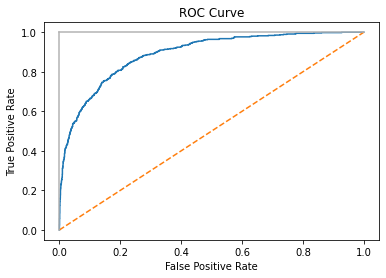

In [182]:
#ROC curve
print('roc_auc_score: ', roc_auc_score(actual_values, preds))
plot_roc('ROC Curve', false_positive_rate, true_positive_rate)

pr_auc_score:  0.7119008274714255


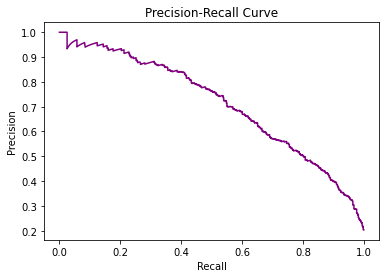

In [183]:
#AUC curve
print('pr_auc_score: ', average_precision_score(actual_values, preds_))
plot_pr_curve(actual_values, preds_)

## Example 2
Predict if a song is "edm"

In [77]:
#50% training, 50% testing
x = df1_features
y = df1['edm']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [78]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8053788330748122
Best Hyperparameters: {'penalty': 'l2', 'solver': 'liblinear'}


array([[1356,   46],
       [ 181,  157]])

In [ ]:
lr = LogisticRegression(penalty='l2', solver='liblinear')
lr.fit(X=x_train, y=y_train)
preds = lr.predict(X=x_train)
preds
len(preds)

#Confusion matrix
preds = lr.predict(x_test)
actual_values = list(y_test)
predicted_values = list(preds)
preds_ = lr.predict_proba(x_test)[:,1]
preds

false_positive_rate, true_positive_rate, threshold = roc_curve(actual_values, preds_)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

In [511]:
x_test

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10
173,0.302207,0.671233,0.612447,0.096806,0.782659,0.000002,0.222502,0.816052,0.383522,0.805509,0.895542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
274,0.342434,0.506849,0.169731,0.970244,0.012717,0.003772,0.110450,0.327490,0.014596,0.059704,0.068490,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
492,0.419156,0.575342,0.562942,0.051641,0.847399,0.000000,0.044249,0.914668,0.056655,0.621822,0.685548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.299161,0.849315,0.690240,0.912858,0.367630,0.000000,0.231649,0.480955,0.688880,0.594229,0.514323,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.425867,0.260274,0.497878,0.193406,0.492486,0.000002,0.479762,0.636734,0.020357,0.257310,0.042645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.349145,0.739726,0.833098,0.105733,0.707514,0.000000,0.371141,0.680944,0.079316,0.334294,0.738316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
225,0.299267,0.410959,0.462518,0.001970,0.794220,0.000000,0.759890,0.727964,0.109468,0.270984,0.654318,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,0.490895,0.438356,0.349364,0.901168,0.317919,0.000006,0.075577,0.561491,0.060688,0.692036,0.052660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,0.411267,0.342466,0.110325,0.662059,0.484393,0.003402,0.118454,0.645885,0.107163,0.761436,0.219255,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_sort

,name,album,artist,id,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Bam Bam (feat. Ed Sheeran),Familia,Camila Cabello,2DB4DdfCFMw1iaR6JaR03a,2022-04-07,206070,76,0.756,0.18200,0.697,0.000000,8,1,0.3330,-6.377,0.0401,94.996,4,0.956,pop
1,Scars To Your Beautiful,Know-It-All,Alessia Cara,0wI7QkCcs8FUQE1OkXUIqd,2015-11-13,230240,75,0.573,0.02850,0.739,0.000000,0,1,0.1110,-5.740,0.1290,97.085,4,0.451,pop
2,What A Time (feat. Niall Horan),Inner Monologue Part 1,Julia Michaels,5WtfUKzXircvW8l5aaVZWT,2019-01-24,173306,77,0.516,0.66200,0.467,0.000000,0,1,0.0853,-6.184,0.0302,132.861,4,0.386,pop
3,Cake By The Ocean,DNCE,DNCE,76hfruVvmfQbw0eYn1nmeC,2016-11-18,219146,77,0.774,0.15200,0.753,0.000000,4,0,0.0371,-5.446,0.0517,119.002,4,0.896,pop
4,Made You Look,Takin' It Back,Meghan Trainor,0QHEIqNKsMoOY5urbzN48u,2022-10-21,134256,89,0.838,0.34500,0.525,0.000002,10,1,0.0771,-3.562,0.0665,144.981,4,0.884,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,Hillbilly Rock,Hillbilly Rock,Marty Stuart,2vuzU4tY5k1lJQBpxhxdI3,1989-01-01,158000,45,0.784,0.24100,0.599,0.000000,5,0,0.1060,-14.624,0.0362,141.401,4,0.906,country
5793,Drink to That All Night (Remix) (feat. Pitbull),Drink to That All Night (Remix) (feat. Pitbull),Jerrod Niemann,7CwboxAi6CvMcWrDfbxttR,2014-05-19,208133,48,0.683,0.00315,0.906,0.000003,9,0,0.1090,-4.117,0.0373,119.973,4,0.540,country
5794,High Cost Of Living,That Lonesome Song,Jamey Johnson,73sWpECi7iZrcISLSRxuaH,2008-01-01,345120,55,0.628,0.01140,0.601,0.000026,0,1,0.3200,-7.036,0.0368,86.006,4,0.396,country
5795,Don't Worry 'Bout A Thing,Sweet Right Here,SHeDAISY,3OBV3QV7wBp5KrAec8qibm,2004-01-01,215026,37,0.695,0.10500,0.847,0.000000,9,1,0.1020,-2.118,0.0610,98.003,4,0.680,country


## Adding Predicted Genre to Main dataframe
We'll use Example 1. We're adding our "rap" predicted results to our main dataframe, with percentages of song being in rap

In [557]:
#Create function to combine predicted and actual value
def compare_predictions(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:,'prediction'] = preds
    test_set.loc[:,'prediction_probability'] = preds_
    test_set['actual'] = actual
    test_set.loc[:,'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'name']
    test_set.loc[:,'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'artist']
    test_set.loc[:,'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index,'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()   
    return test_set

In [520]:
len(x_test)

153

In [558]:
#Implement function to df
predictions = compare_predictions(preds, preds_, actual_values, x_test, df1)

### Predictions table
The table below indicates if a song is predicted and is actually "rap". We included the percentage of the song being labeled as "rap".

In [559]:
predictions = predictions[['prediction','prediction_probability','actual','name','artist','album']]
predictions

,prediction,prediction_probability,actual,name,artist,album
0,1.0,0.593753,1.0,JOC IN '06,DaBaby,JOC IN '06
1,1.0,0.587322,1.0,LET GO,Central Cee,LET GO
2,1.0,0.582616,1.0,Ron Artest,Babyface Ray,Ron Artest
3,1.0,0.531368,0.0,Hey Mor,Ozuna,Hey Mor
4,0.0,0.452444,1.0,My All,Polo G,My All
...,...,...,...,...,...,...
148,0.0,0.013695,0.0,Sorry (with Madonna),BLOND:ISH,Sorry (with Madonna)
149,0.0,0.012770,0.0,Line It Up (feat. LP),Palaye Royale,Fever Dream
150,0.0,0.012701,0.0,One Thing At A Time,Morgan Wallen,One Thing At A Time (Sampler)
151,0.0,0.012189,0.0,ANGELA (feat. Jimi Somewhere),Sval,ANGELA (feat. Jimi Somewhere)


In [570]:
#Song is not rap
predictions_actual.sort_values('prediction_probability',ascending=True).head(10)

,prediction,prediction_probability,actual,name,artist,album
74,0.0,0.051188,1.0,Too Many Nights (feat. Don Toliver & with Future),Metro Boomin,HEROES & VILLAINS
50,0.0,0.075542,1.0,Fact (feat. Lil Uzi Vert),Ghostluvme,Fact (feat. Lil Uzi Vert)
47,0.0,0.077678,1.0,Lately,NAV,Lately
39,0.0,0.083776,1.0,Champions,NLE Choppa,Champions
29,0.0,0.106180,1.0,Just Wanna Rock,Lil Uzi Vert,Just Wanna Rock
24,0.0,0.135470,1.0,FreakyT,TiaCorine,I Can't Wait
22,0.0,0.145251,1.0,Do It Right,Don Toliver,Do It Right
20,0.0,0.149030,1.0,Torpedo,Rae Sremmurd,Torpedo
19,0.0,0.156057,1.0,Don't Play With It (feat. Billy B),Lola Brooke,Don't Play With It (feat. Billy B)
17,0.0,0.175156,1.0,"One Mic, One Gun",Nas,"One Mic, One Gun"


### Pivot Analysis of Predictions Table

In [544]:
#Song is actually rap but is not- model still needs work
predictions[(predictions['prediction']==0)&(predictions['actual']==1)]

,prediction,prediction_probability,actual,name,artist,album
4,0.0,0.452444,1.0,My All,Polo G,My All
7,0.0,0.338002,1.0,Do It Again (feat. 2Rare),NLE Choppa,Do It Again (feat. 2Rare)
8,0.0,0.323847,1.0,FTCU (feat. GloRilla & Gangsta Boo),Latto,FTCU (feat. GloRilla & Gangsta Boo)
9,0.0,0.292687,1.0,Two Tens (feat. Anderson .Paak),Cordae,Two Tens (feat. Anderson .Paak)
11,0.0,0.239621,1.0,Out thë way,Yeat,Lyfë
12,0.0,0.221643,1.0,Jigsaw,Key Glock,PRE5L
13,0.0,0.207370,1.0,Me & You,Central Cee,Me & You
14,0.0,0.192030,1.0,"Hey, Mickey!",Baby Tate,"Hey, Mickey!"
17,0.0,0.175156,1.0,"One Mic, One Gun",Nas,"One Mic, One Gun"
19,0.0,0.156057,1.0,Don't Play With It (feat. Billy B),Lola Brooke,Don't Play With It (feat. Billy B)
